<center><h1>Kan_Herun_HW5</h1></center>
<br>
<br>

Name: Herun Kan
<br>
Github Username: herunkan
<br>
USC ID: 7222919427

## 1. Decision Trees as Interpretable Models

Import packages

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV, Lasso, LinearRegression, RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import math
from xgboost import XGBRegressor


### (a) Obtain Data

Get the Accute Inamations Data Set

In [35]:
diagnosis_columns = ['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra', 'decision: Inflammation', 'decision: Nephritis']
diagnosis_data = pd.read_csv('../data/diagnosis.data', sep = '\t', names = diagnosis_columns, encoding='utf-16')

diagnosis_data['Temperature'] = diagnosis_data['Temperature'].str.replace(',', '.').astype(float)

diagnosis_data[['Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra','decision: Inflammation', 'decision: Nephritis']] = diagnosis_data[['Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra','decision: Inflammation', 'decision: Nephritis']].applymap(lambda x: 1 if x == "yes" else 0)

diagnosis_Inflammation = diagnosis_data.iloc[:, :-1]

diagnosis_Nephritis = diagnosis_data.drop(columns=['decision: Inflammation'])

print(diagnosis_Nephritis,
      diagnosis_Inflammation)

     Temperature  Nausea  Lumbar pain  Urine pushing  Micturition pains  \
0           35.5       0            1              0                  0   
1           35.9       0            0              1                  1   
2           35.9       0            1              0                  0   
3           36.0       0            0              1                  1   
4           36.0       0            1              0                  0   
..           ...     ...          ...            ...                ...   
115         41.4       0            1              1                  0   
116         41.5       0            0              0                  0   
117         41.5       1            1              0                  1   
118         41.5       0            1              1                  0   
119         41.5       0            1              1                  0   

     Burning of urethra  decision: Nephritis  
0                     0                    0  
1    

/var/folders/5_/zn1tlqnd50z90_mf2r06kkf40000gn/T/ipykernel_17500/3605295572.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  diagnosis_data[['Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra','decision: Inflammation', 'decision: Nephritis']] = diagnosis_data[['Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra','decision: Inflammation', 'decision: Nephritis']].applymap(lambda x: 1 if x == "yes" else 0)


### (b) Build a decision tree

In [44]:
x_train_neph = diagnosis_Nephritis.iloc[:, :-1]
y_train_neph = diagnosis_Nephritis.iloc[:, -1]

x_train_inf = diagnosis_Inflammation.iloc[:, :-1]
y_train_inf = diagnosis_Inflammation.iloc[:, -1]

x_train_all = diagnosis_data.iloc[:, :-2]
y_train_all = diagnosis_data.iloc[:, -2:]

neph_model = tree.DecisionTreeClassifier()
neph_model = neph_model.fit(x_train_neph, y_train_neph)

inf_model = tree.DecisionTreeClassifier()
inf_model = inf_model.fit(x_train_inf, y_train_inf)

all_model = tree.DecisionTreeClassifier()
all_model = all_model.fit(x_train_all, y_train_all)
features = ['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra']

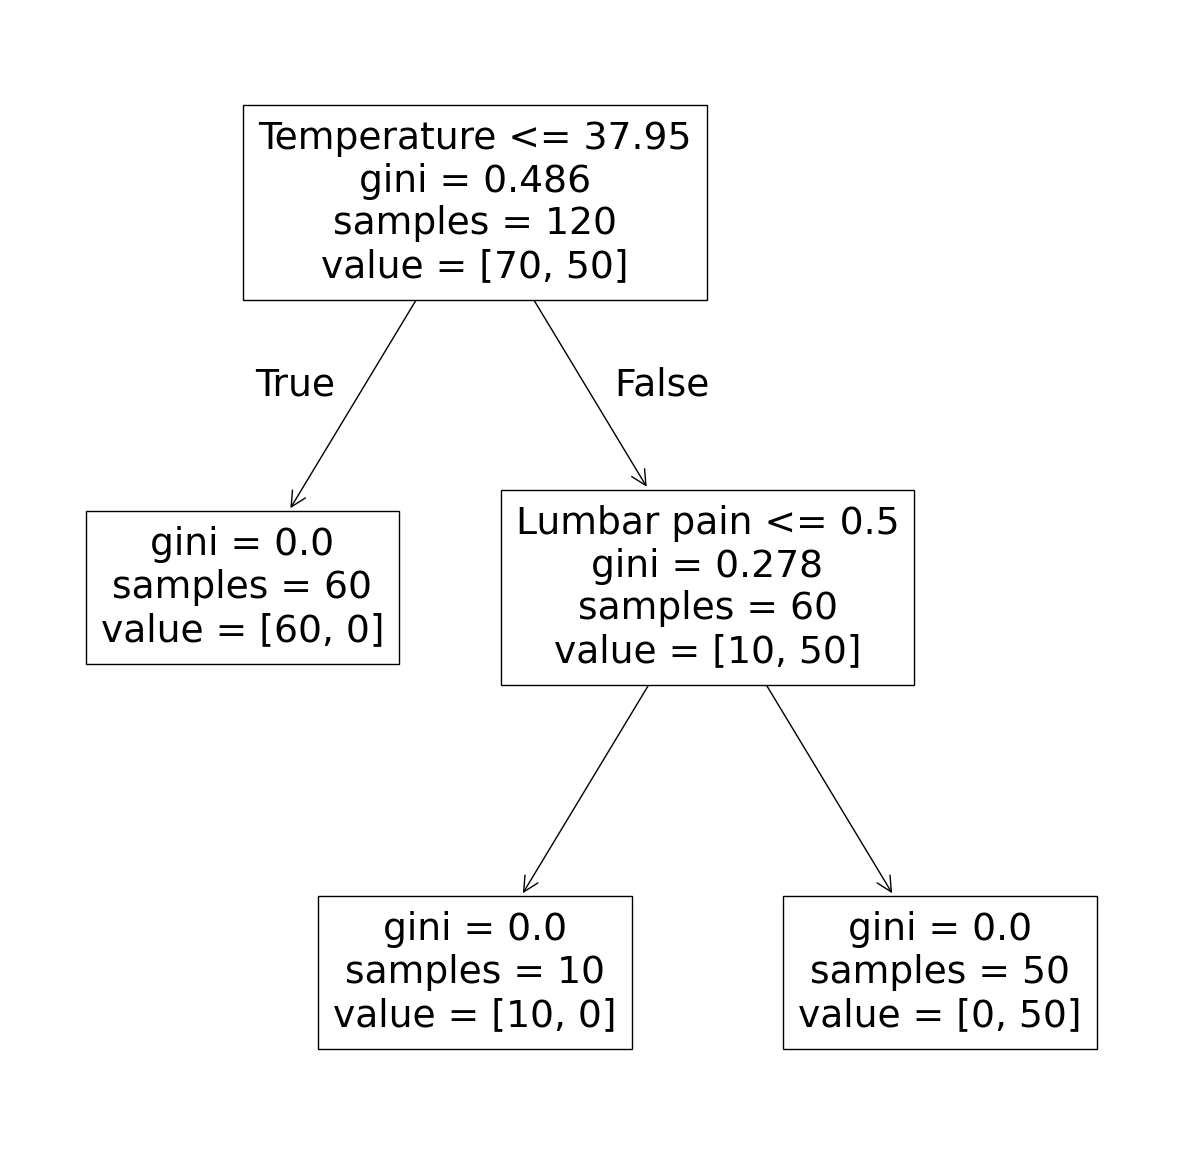

In [45]:
plt.figure(figsize=(15, 15))
tree.plot_tree(neph_model, feature_names=features)
plt.show()

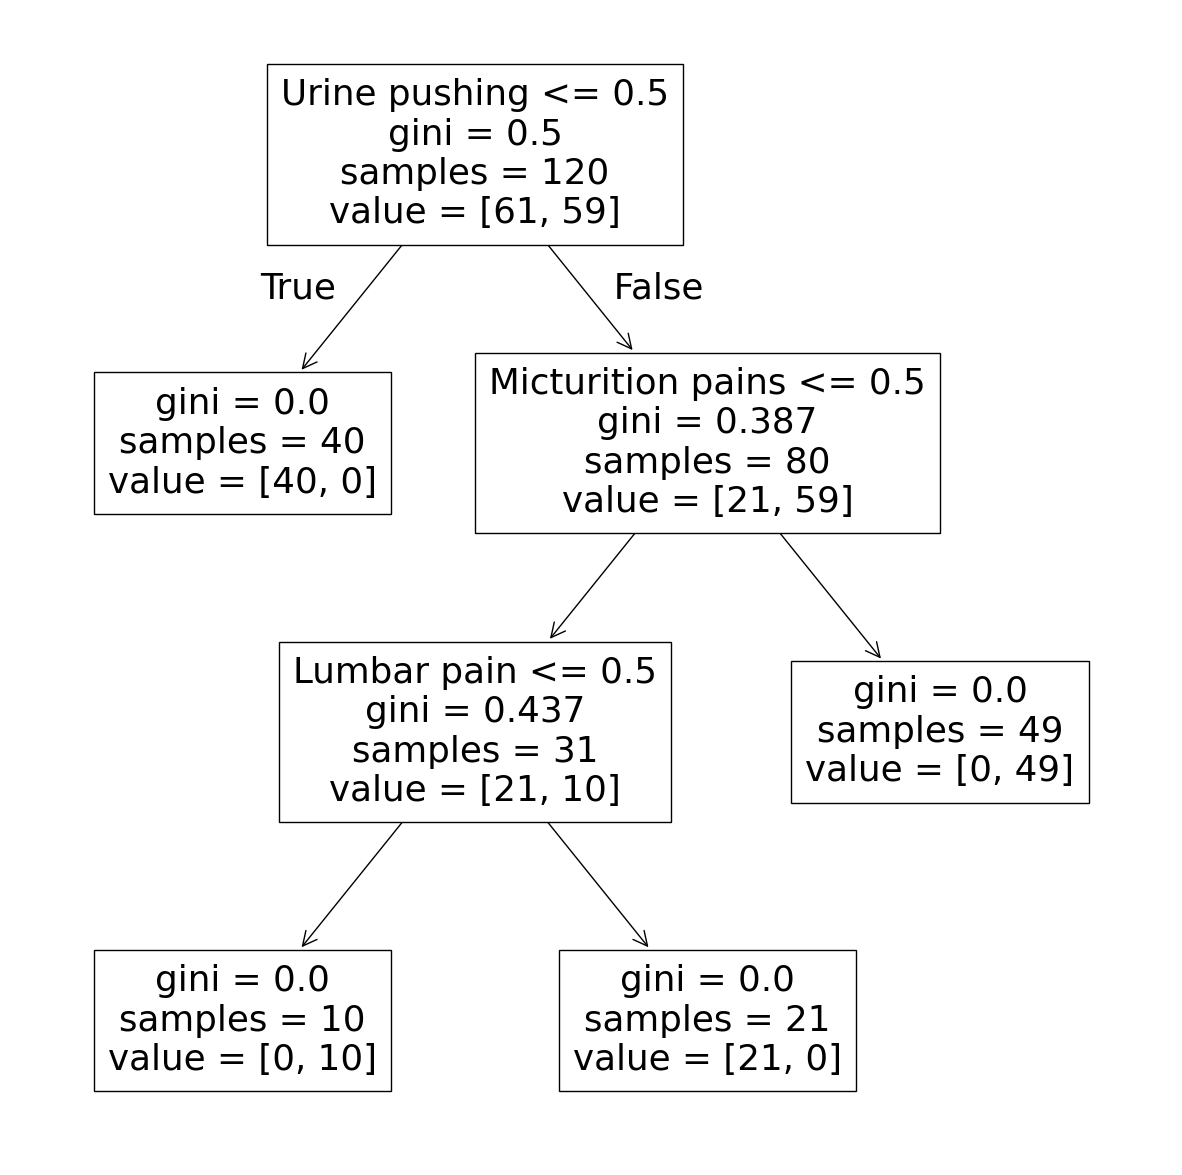

In [46]:
plt.figure(figsize=(15, 15))
tree.plot_tree(inf_model, feature_names=features)
plt.show()

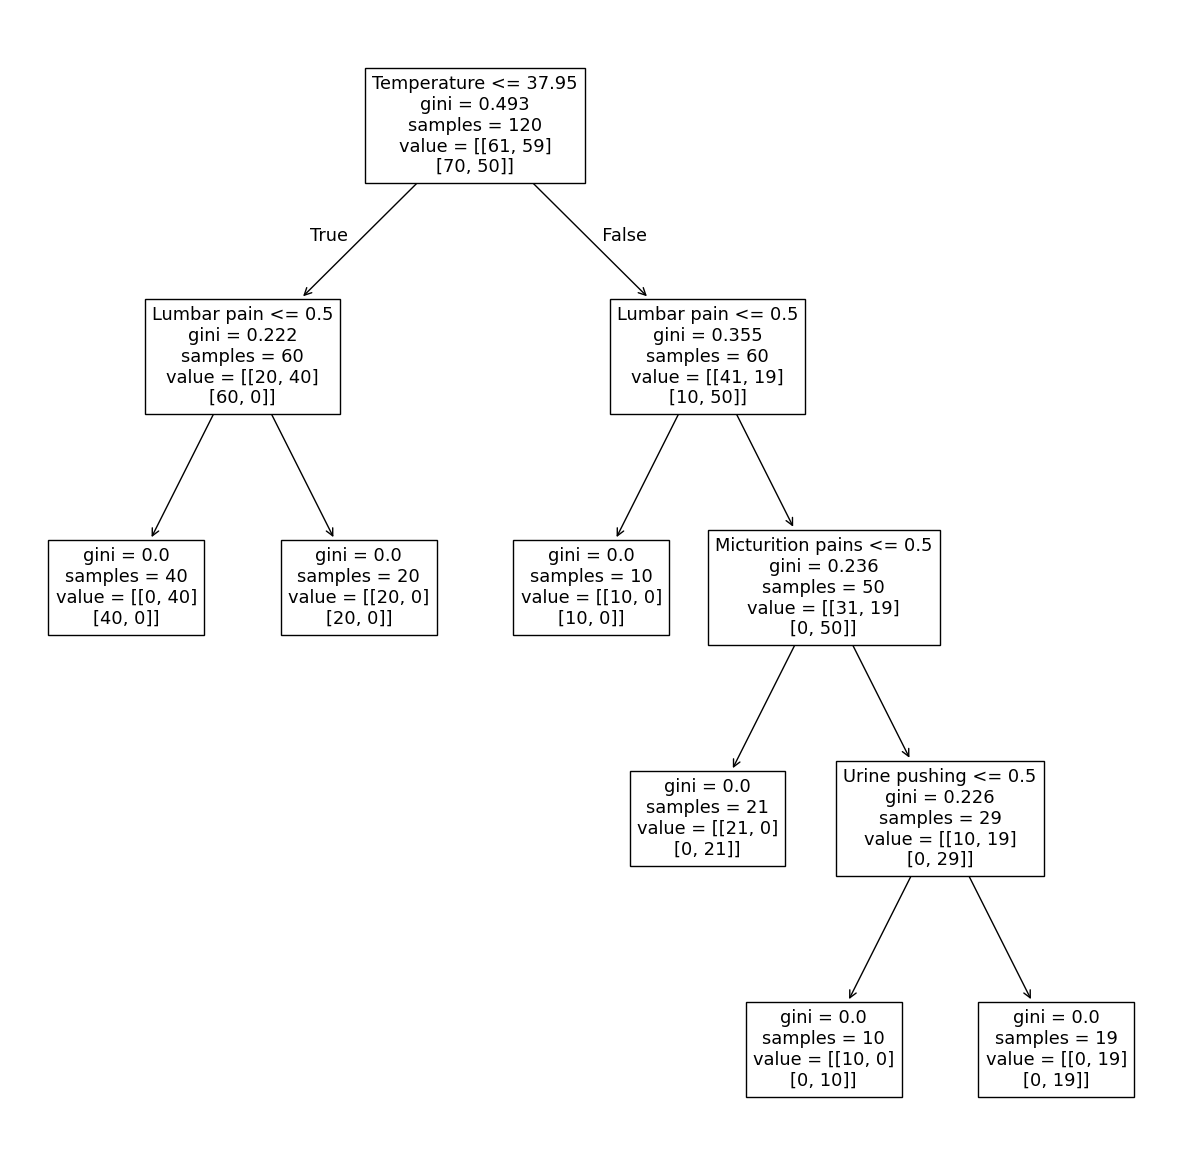

In [47]:
plt.figure(figsize=(15, 15))
tree.plot_tree(all_model, feature_names=features)
plt.show()

### (c) Convert the decision rules

In [48]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

In [49]:
tree_to_code(inf_model, features)

def tree(Temperature, Nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra):
  if Urine pushing <= 0.5:
    return [[1. 0.]]
  else:  # if Urine pushing > 0.5
    if Micturition pains <= 0.5:
      if Lumbar pain <= 0.5:
        return [[0. 1.]]
      else:  # if Lumbar pain > 0.5
        return [[1. 0.]]
    else:  # if Micturition pains > 0.5
      return [[0. 1.]]


In [50]:
tree_to_code(neph_model, features)

def tree(Temperature, Nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra):
  if Temperature <= 37.95000076293945:
    return [[1. 0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[1. 0.]]
    else:  # if Lumbar pain > 0.5
      return [[0. 1.]]


In [51]:
tree_to_code(all_model, features)

def tree(Temperature, Nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra):
  if Temperature <= 37.95000076293945:
    if Lumbar pain <= 0.5:
      return [[0. 1.]
 [1. 0.]]
    else:  # if Lumbar pain > 0.5
      return [[1. 0.]
 [1. 0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[1. 0.]
 [1. 0.]]
    else:  # if Lumbar pain > 0.5
      if Micturition pains <= 0.5:
        return [[1. 0.]
 [0. 1.]]
      else:  # if Micturition pains > 0.5
        if Urine pushing <= 0.5:
          return [[1. 0.]
 [0. 1.]]
        else:  # if Urine pushing > 0.5
          return [[0. 1.]
 [0. 1.]]


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [ ]:
communities_columns = ['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']
communities_data = pd.read_csv('../data/communities.data', sep = ',', names = communities_columns)
communities_data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


### (b) Missing values

In [ ]:
communities_data.drop(['state','county','community','communityname','fold'], axis=1, inplace=True)

communities_data = communities_data.replace('?', np.nan)
# Use simpleimputer for the missing values
imp = SimpleImputer(strategy="mean")
communities_filled = imp.fit_transform(communities_data)
# Convert result to dataframe
communities_filled = pd.DataFrame(communities_filled, columns=['population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop'])
communities_filled

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


### (c) Plot a correlation matrix

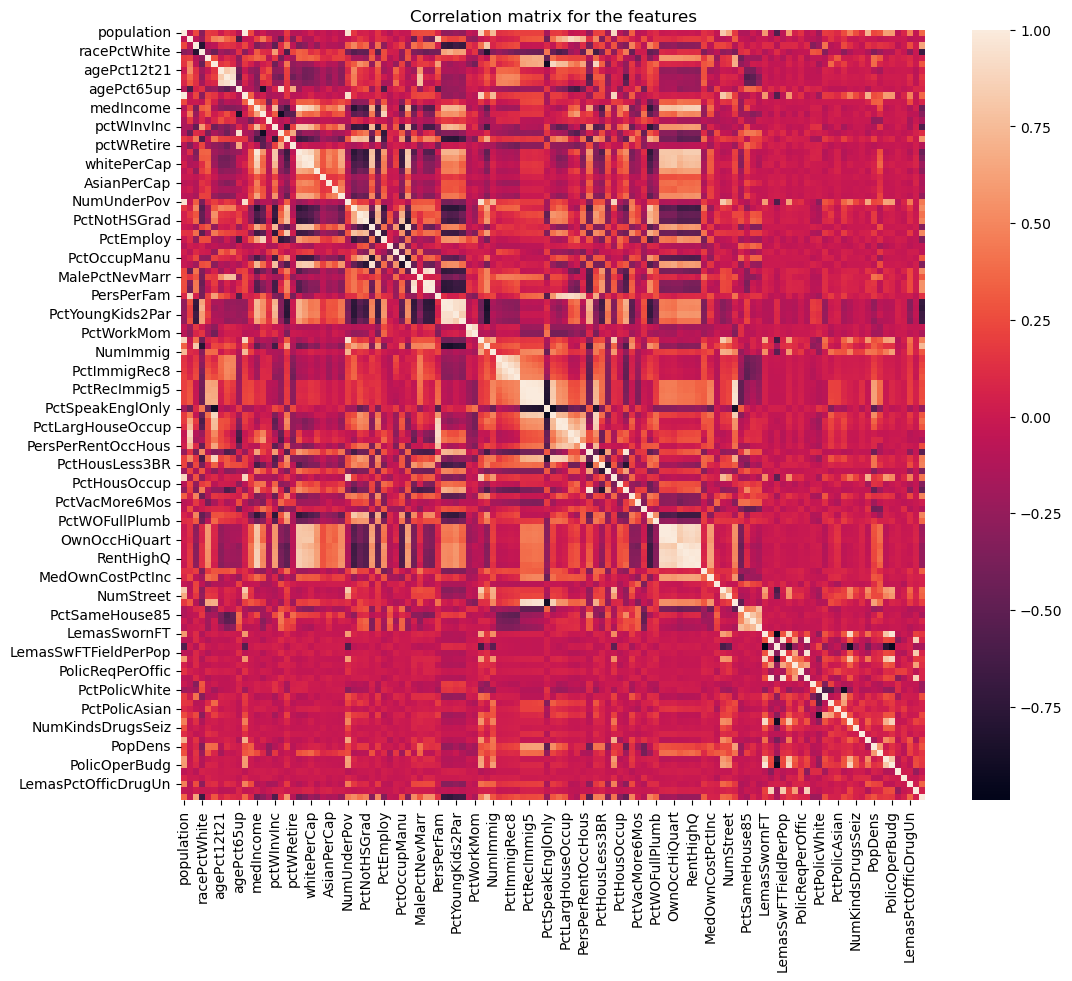

In [74]:
plt.figure(figsize=(12, 10))
sns.heatmap(communities_filled.corr())
plt.title("Correlation matrix for the features")
plt.show()

### (d) Calculate the Coefficient of Variation CV

In [ ]:
communities_cv = pd.DataFrame(communities_filled.apply(lambda x: np.std(x, ddof=1) / np.mean(x) * 100))

,0
population,220.350254
householdsize,35.329830
racepctblack,141.092040
racePctWhite,32.378156
racePctAsian,135.916219
...,...
LemasPctPolicOnPatr,12.233126
LemasGangUnitDeploy,36.804007
LemasPctOfficDrugUn,255.526600
PolicBudgPerPop,33.728080


### (e) Scatter plots and box plots for highest CV features

In [79]:
communities_top_cv = communities_cv.sort_values(by=[0], ascending=False).head(math.floor(math.sqrt(128)))
top_index = communities_top_cv.index.to_list()

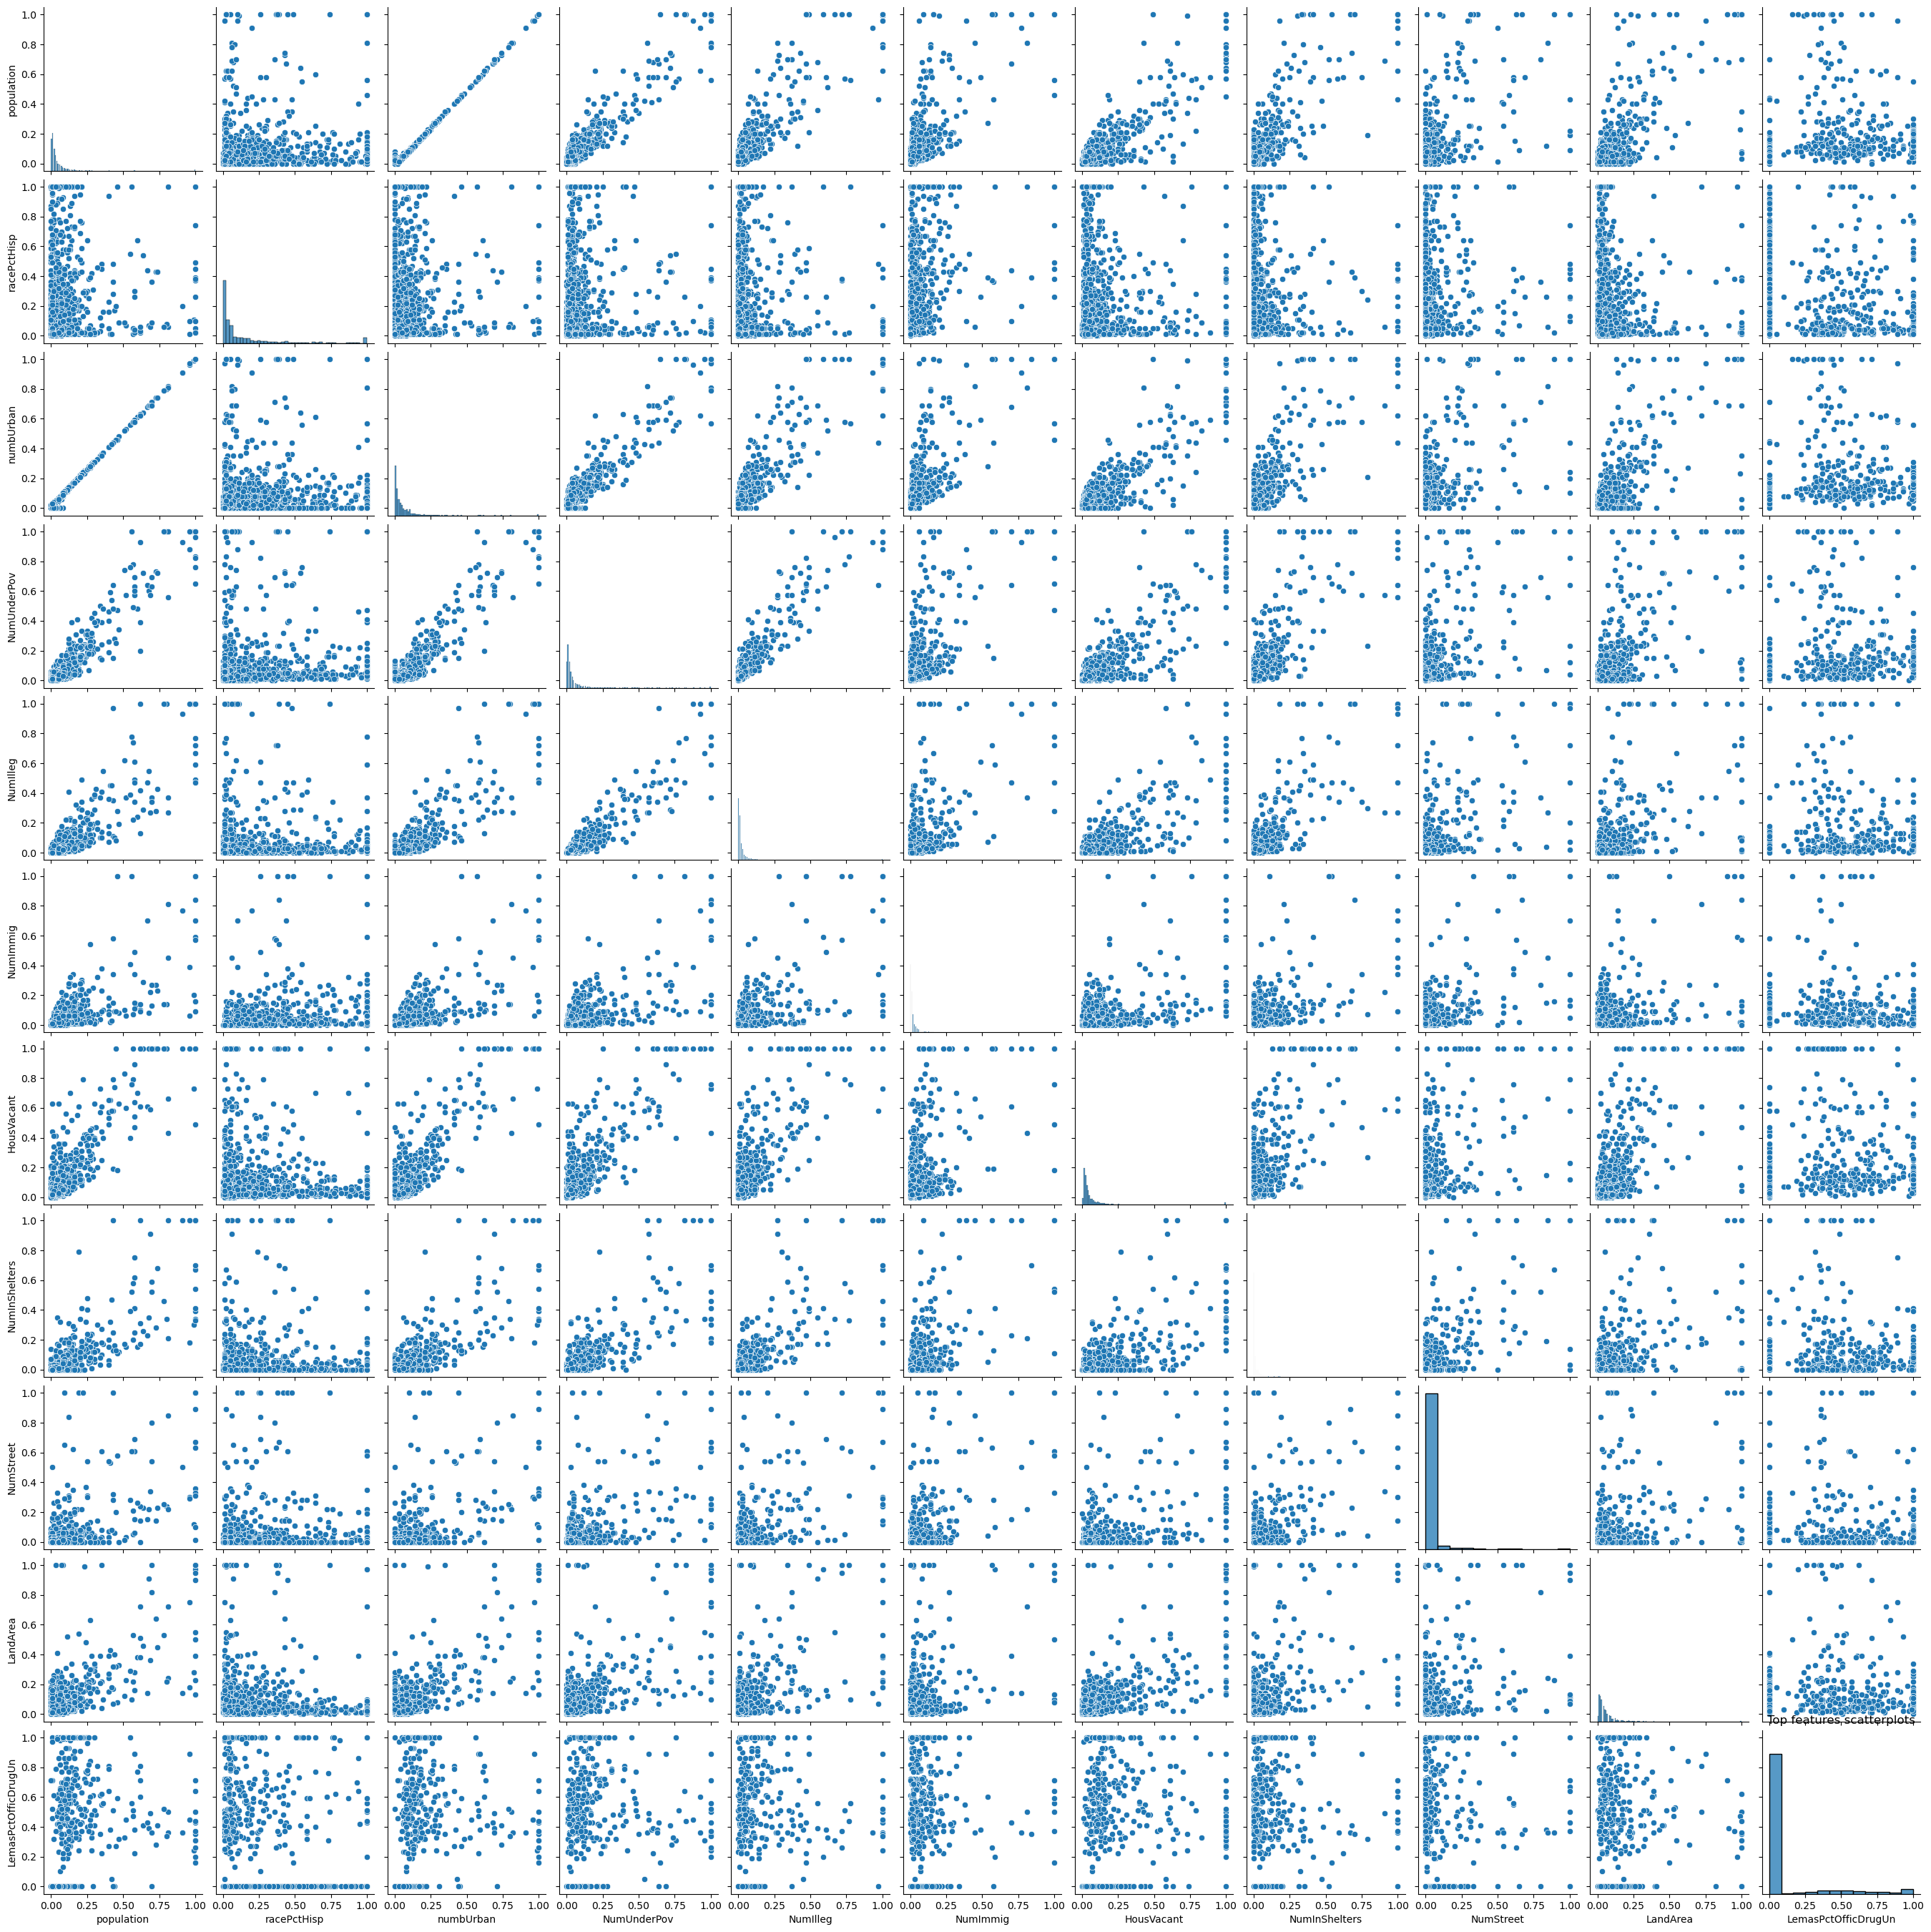

In [80]:
communities_cv_features = communities_filled[communities_filled.columns.intersection(top_index)]
sns.pairplot(communities_cv_features)
plt.title("Top features scatterplots")
plt.show()

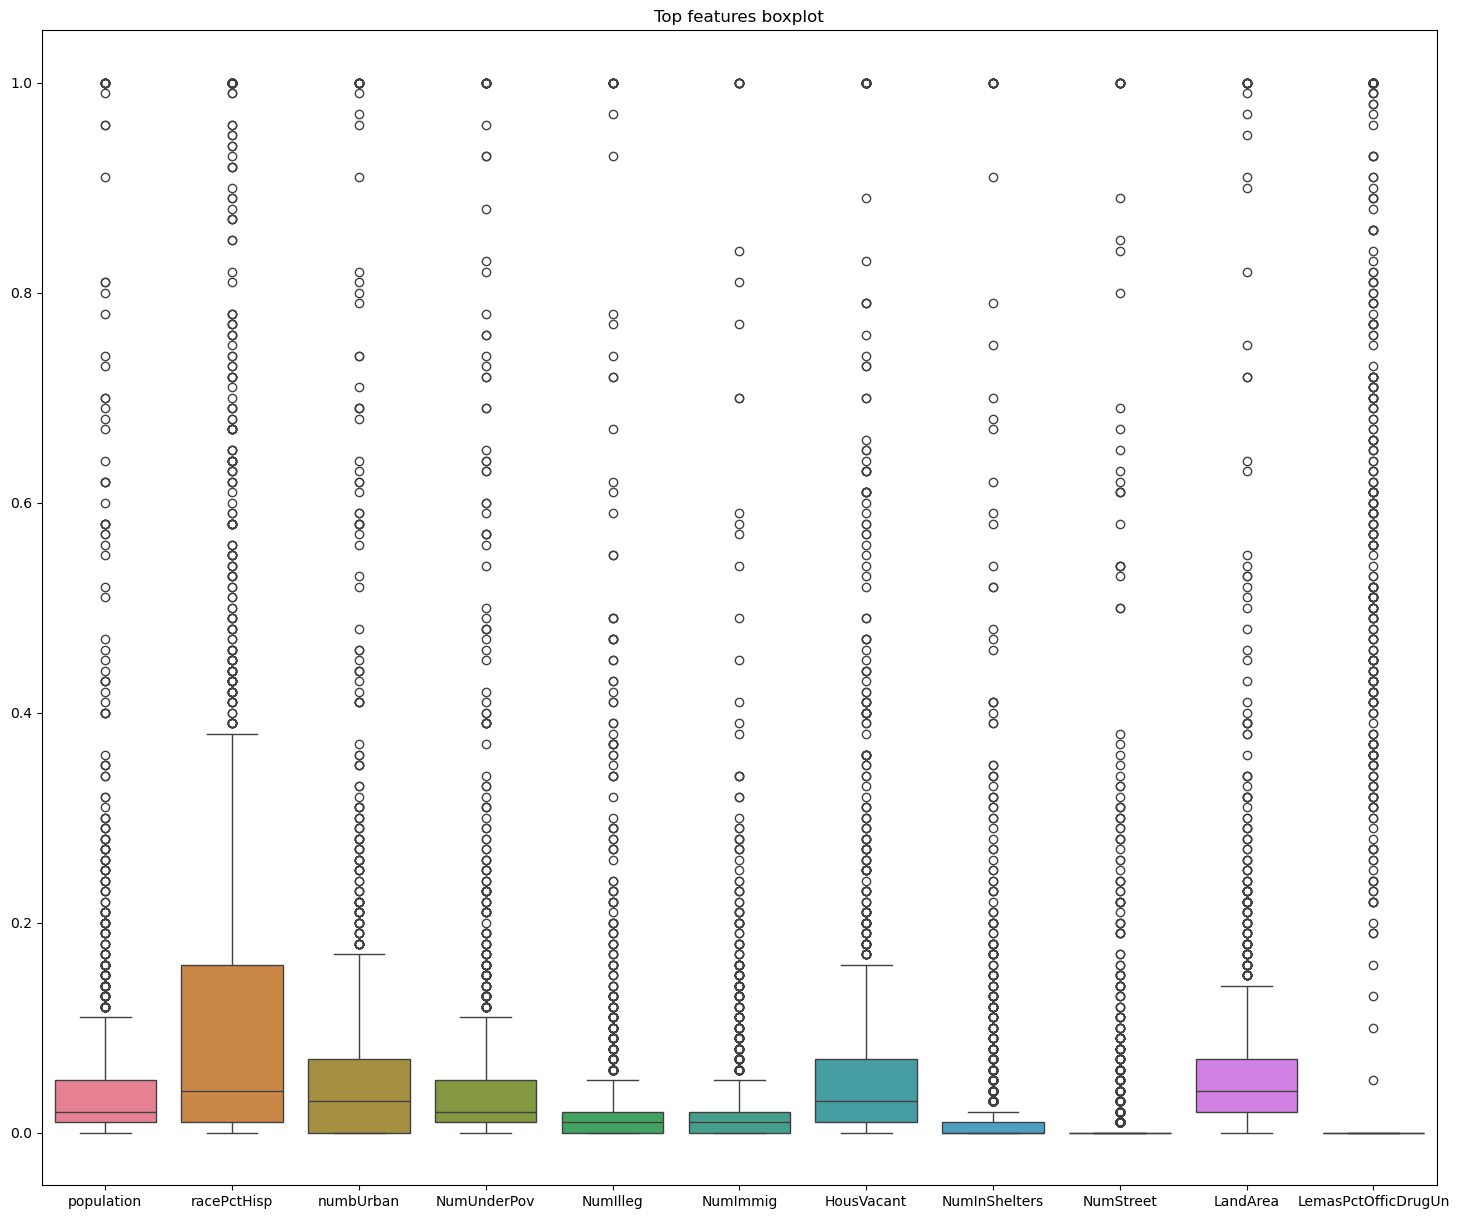

In [84]:
plt.figure(figsize=(18, 15))
sns.boxplot(data=communities_cv_features)
plt.title("Top features boxplot")
plt.show()

### (f) Fit a linear model

In [88]:
communities_train = communities_filled.iloc[:1495, :]
communities_test = communities_filled.iloc[1495:, :]

X_train = communities_train.iloc[:, :-1]
y_train = communities_train.iloc[:, -1:]
X_test = communities_test.iloc[:, :-1]
y_test = communities_test.iloc[:, -1:]

linear_reg = LinearRegression().fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
linear_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print(linear_reg_MSE)

0.7897255274384714


### (g) Fit a ridge regression model

In [95]:
#Helped by GPT

#Prompt:

# what does it mean:
# Fit a ridge regression model on the training set, with 
# lambda chosen by cross-validation.

#Response:

# Select the Best  \alpha  Using Cross-Validation: Cross-validation involves splitting the training set into several folds, training the model on some folds, and validating it on the remaining folds. This process is repeated for different values of  \alpha  to find the one that minimizes the validation error.

lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

ridge_cv = RidgeCV(alphas=lambdas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
test_error = metrics.mean_squared_error(y_test, y_pred)

print("Best alpha:", ridge_cv.alpha_)
print("Test error (MSE):", test_error)

Best alpha: 1.0
Test error (MSE): 0.017737081104303647


/Users/herunkan/Coding/ENVS/miniconda3/envs/minimal_ds/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


### (h) Fit a LASSO model

In [98]:
lasso_reg = LassoCV(alphas=lambdas, cv=5)
lasso_reg.fit(X_train, y_train.values.ravel())
y_pred = lasso_reg.predict(X_test)
lasso_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'Lasso error: {lasso_reg_MSE}')

importance = np.abs(lasso_reg.coef_)
important_variable = list()
for i in range(0, len(importance)):
    if importance[i] > 0:
        important_variable.append("Feature " + str(i))
        
print(f'Total number of selected variables: {len(important_variable)}')

Lasso error: 0.017545287811568618
Total number of selected variables: 23


In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_reg_scaled = LassoCV(alphas=lambdas, cv=5)
lasso_reg_scaled.fit(X_train_scaled, y_train.values.ravel())
y_pred_scaled = lasso_reg_scaled.predict(X_test_scaled)

lasso_reg_scaled_MSE = metrics.mean_squared_error(y_test, y_pred_scaled)
print(f'Lasso error (standardized): {lasso_reg_scaled_MSE}')

importance_scaled = np.abs(lasso_reg_scaled.coef_)
important_variable_scaled = list()
for i in range(0, len(importance_scaled)):
    if importance_scaled[i] > 0:
        important_variable_scaled.append("Feature " + str(i))
        
print(f'Total number of selected variables (standardized): {len(important_variable_scaled)}')

Lasso error (standardized): 0.017762886468429207
Total number of selected variables (standardized): 68


### (i) Fit a PCR model

In [104]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
])

param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1] + 1)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

best_n_components = grid_search.best_params_['pca__n_components']
print(f'Optimal number of components: {best_n_components}')

y_pred = grid_search.predict(X_test)
pcr_test_error = metrics.mean_squared_error(y_test, y_pred)
print(f'PCR test error: {pcr_test_error}')

Optimal number of components: 95
PCR test error: 0.0183959674910206


### (j) Fit a boosting tree

In [109]:
alphas = list(np.logspace(-4, 2, 20))
param_grid = {'reg_alpha': alphas, 'random_state': [42]}
xgb_reg = XGBRegressor(objective='reg:squarederror', booster='gbtree')

grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

best_alpha = grid_search.best_params_['reg_alpha']
print(f'Optimal alpha (L1 regularization term): {best_alpha}')
best_xgb_reg = XGBRegressor(objective='reg:squarederror', booster='gbtree', reg_alpha=best_alpha)
best_xgb_reg.fit(X_train, y_train.values.ravel())

y_pred = best_xgb_reg.predict(X_test)
test_error = metrics.mean_squared_error(y_test, y_pred)
print(f'Boosting tree test error with L1 regularization: {test_error}')

Optimal alpha (L1 regularization term): 2.6366508987303554
Boosting tree test error with L1 regularization: 0.017626082312422933
